## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

## 2. Displaying Max Rows

In [2]:
pd.set_option('display.max_rows', None)

## 3. Reading the Data 

In [3]:
df = pd.read_csv('D:/Shreshth/projects/Clustering/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 4. Analysing the Data

In [4]:
# Converting the Columns : exports, health and imports into Actual values as it is given as the percentage of gdpp

df['exports'] = df['exports']/100 * df['gdpp']
df['health'] = df['health']/100 * df['gdpp']
df['imports'] = df['imports']/100 * df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [5]:
# Checking the shape of the dataframe

df.shape

(167, 10)

In [6]:
# Checking the basic functions like mean, min and max

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Checking for nulls and data type of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# Checking for the null values

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values.

## 5. EDA

[Text(0, 0.5, 'Child Mortality Rate'), Text(0.5, 0, '')]

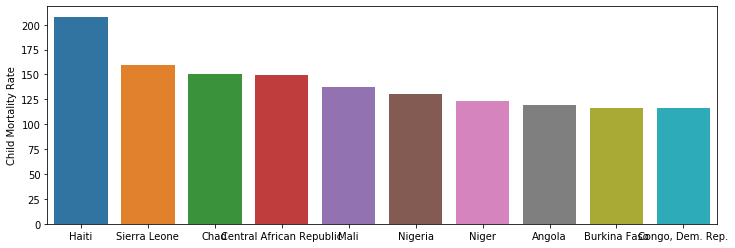

In [9]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

plt.figure(figsize=(12,4))
top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort)
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

Haiti has the highest Child Mortality Rate followed by Sierra Leone.

[Text(0, 0.5, 'Life Expectancy'), Text(0.5, 0, '')]

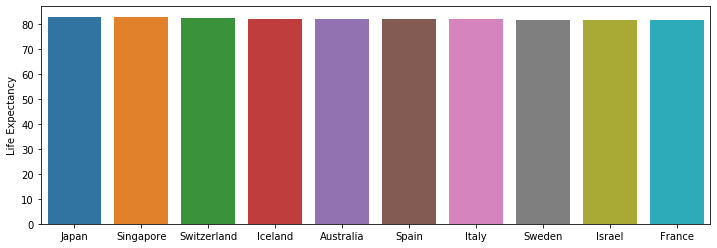

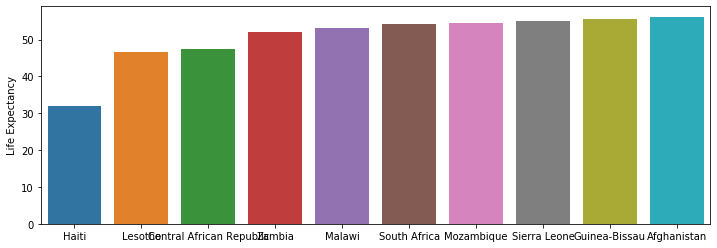

In [10]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

plt.figure(figsize=(12,4))
bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec)
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

plt.figure(figsize=(12,4))
bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec)
plt1.set(xlabel = '', ylabel= 'Life Expectancy')


Haiti has the lowest Life Expectancy 32 years,followed by Lesotho and Central Africa with approx 45yrs and the highest expectancy is 82 years.

[Text(0, 0.5, 'Health'), Text(0.5, 0, '')]

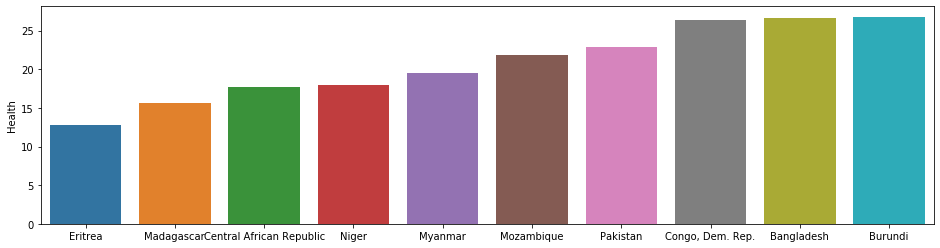

In [11]:
# Health :Total health spending as %age of Total GDP.

plt.figure(figsize=(16,4))
bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health)
plt1.set(xlabel = '', ylabel= 'Health')

The Health is lowest is in Eritrea followed by Madagascar and Central African Republic

[Text(0, 0.5, 'GDP per capita'), Text(0.5, 0, '')]

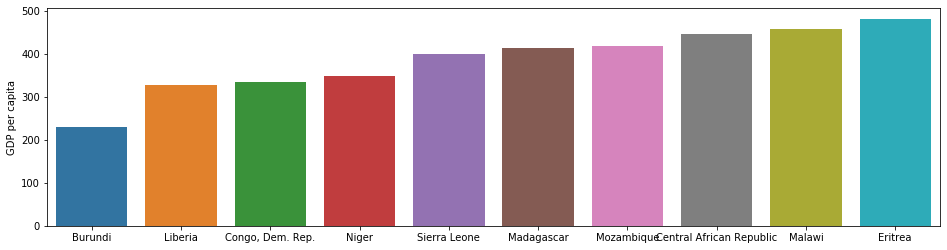

In [12]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.

plt.figure(figsize=(16,4))
bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp)
plt1.set(xlabel = '', ylabel= 'GDP per capita')

The GDP is lowest for Burundi with approx 220 GDP per capita. Followed by Liberia (approx 320) and then Congo.

[Text(0, 0.5, 'Per capita Income'), Text(0.5, 0, '')]

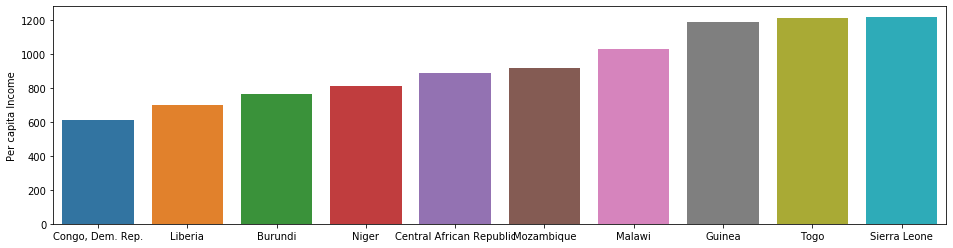

In [13]:
# Per capita Income : Net income per person
plt.figure(figsize=(16,4))

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income)
plt1.set(xlabel = '', ylabel= 'Per capita Income')

The income per person is lowest in Congo (600), followed by Liberia and Burundi

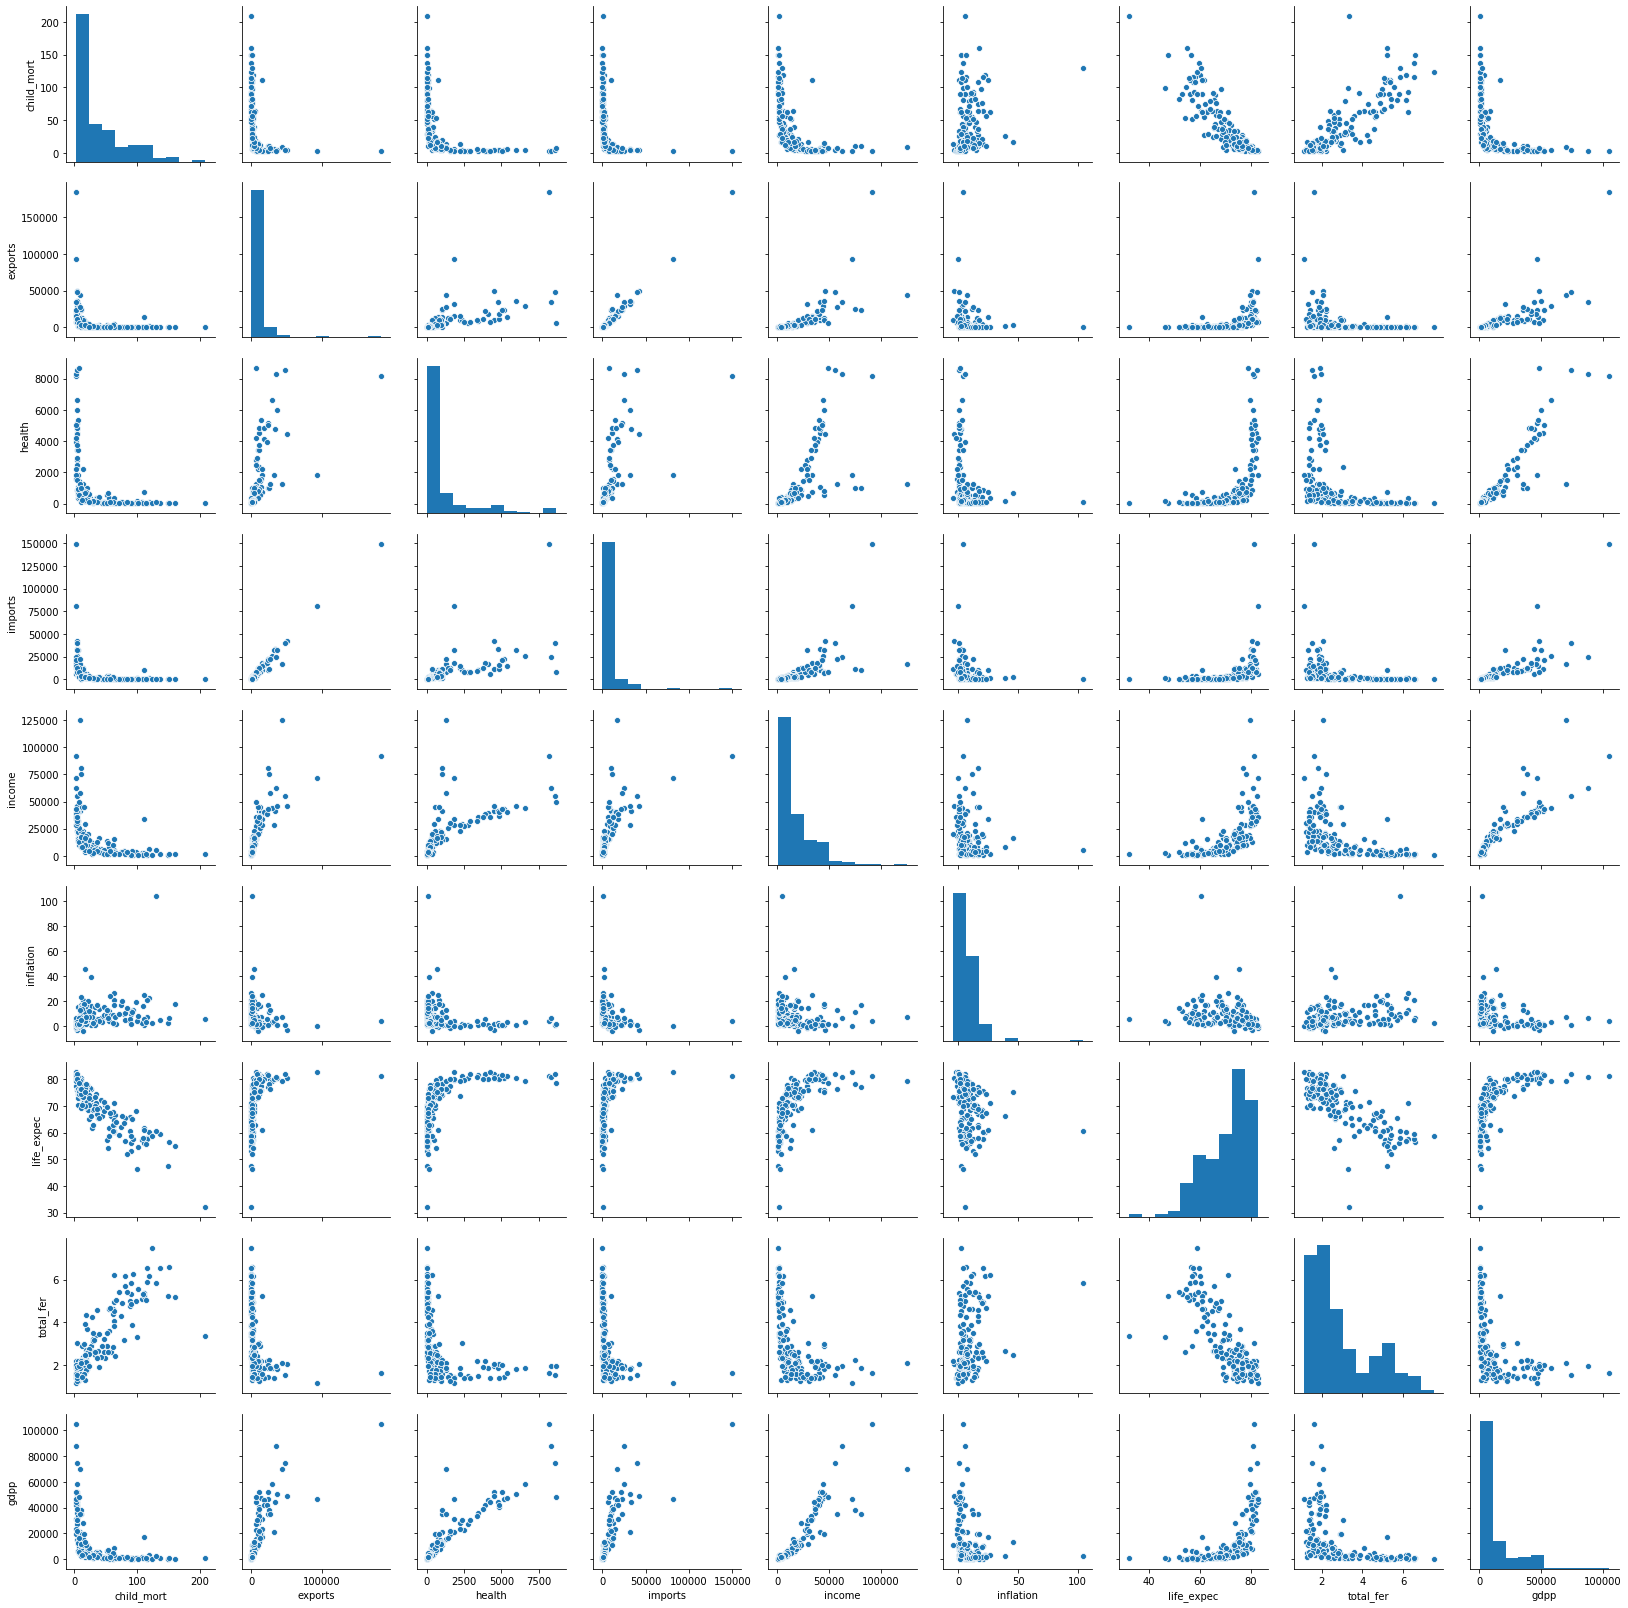

In [14]:
# Pairplot of all numeric columns

sns.pairplot(df)

Representing all the correlation between different features

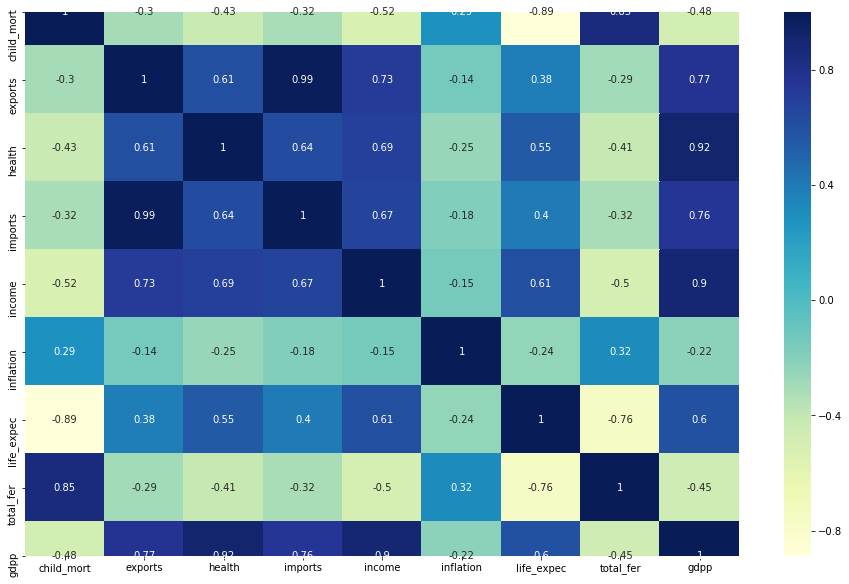

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

child_mortality and life_expentency are highly correlated with correlation of -0.89

child_mortality and total_fertility are highly correlated with correlation of 0.85

imports and exports are highly correlated with correlation of 0.74

life_expentency and total_fertility are highly correlated with correlation of -0.76

In [16]:
# Creating a list for all the columns expect for country

feature = list(df.columns[1:])
for i in enumerate(feature): # enumerate is adding the index number to the column name
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


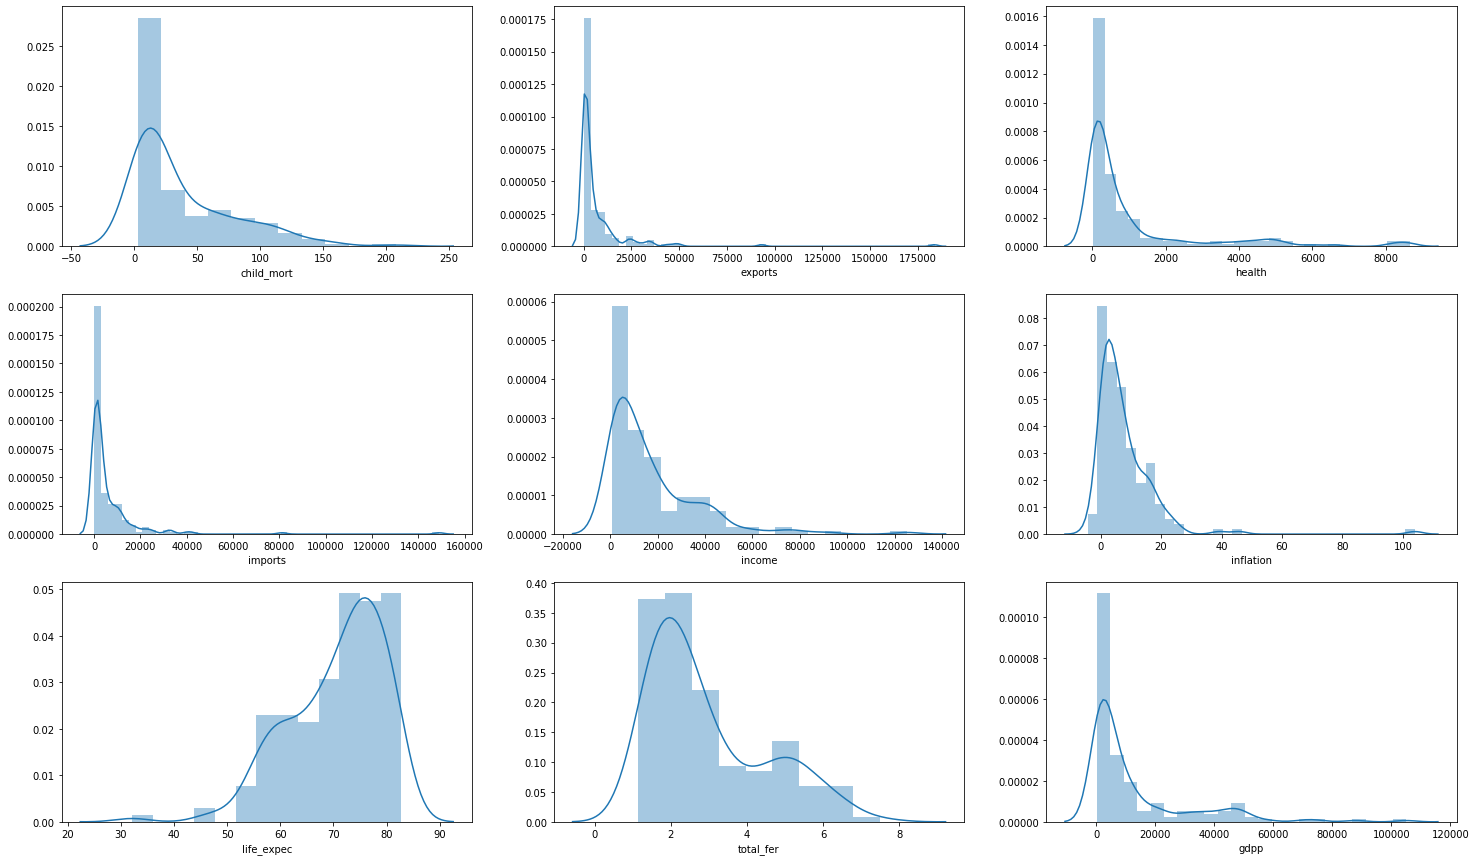

In [17]:
# Creating a for loop for plotting the Histogram for all the columns

plt.figure(figsize = (25,15))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])

It can be observed that there is variation in the data, which gives us the insights of how many clusters can be created :

gdpp mostly lie in range of 0-20000, then 40000-50000 and 20000-40000

income mostly lie in range of 0-20000, then 40000-50000 and 20000-40000

exports mostly lie in range of 0-20000 and then 30000

health mostly lie in 0-2000 and 4000-5000

total_fer lie mostly in 1-3 and then 5-6

## 6. Outlier treatment

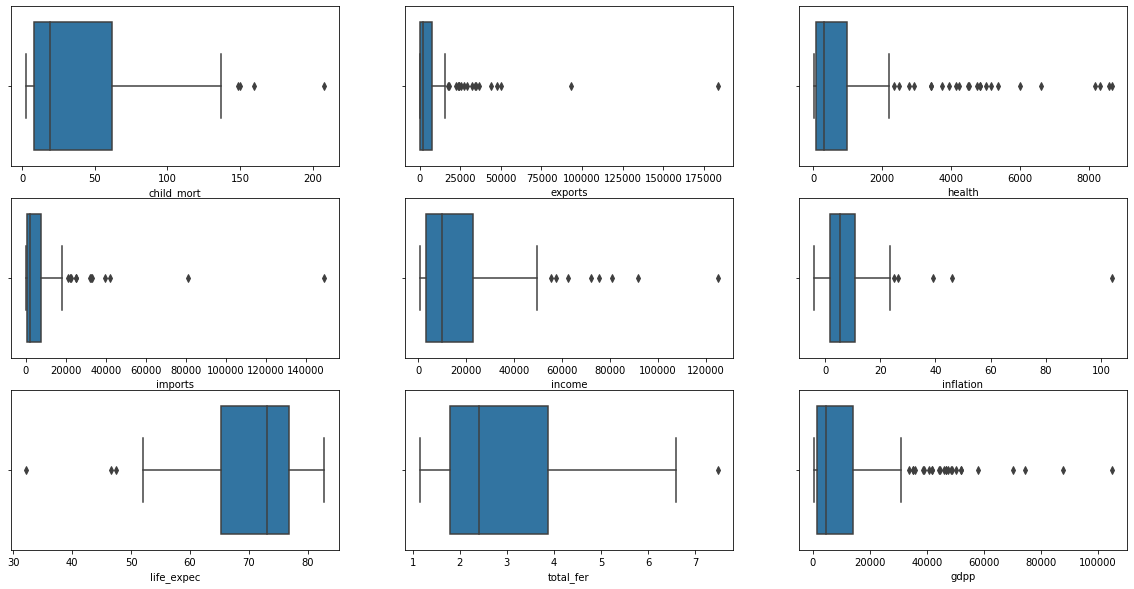

In [18]:
# Plotting the boxplot for each column using for loop and then observing the outliers

plt.figure(figsize = (20,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

The above graphs represent that large amount of outliers are present for different variables.

In [19]:
# Capping only for upper quantile (0.99). We didnt perform capping for lower quantile because
#we dont want to loose the data of the lower range otherwise we might remove the countries which are in need of the aid.

feature1 = list(df[['exports','health', 'imports', 'income', 'inflation','total_fer', 'gdpp']])
for i in feature1:
    q4 = df[i].quantile(0.99)
    df[i][df[i]>=q4]=q4

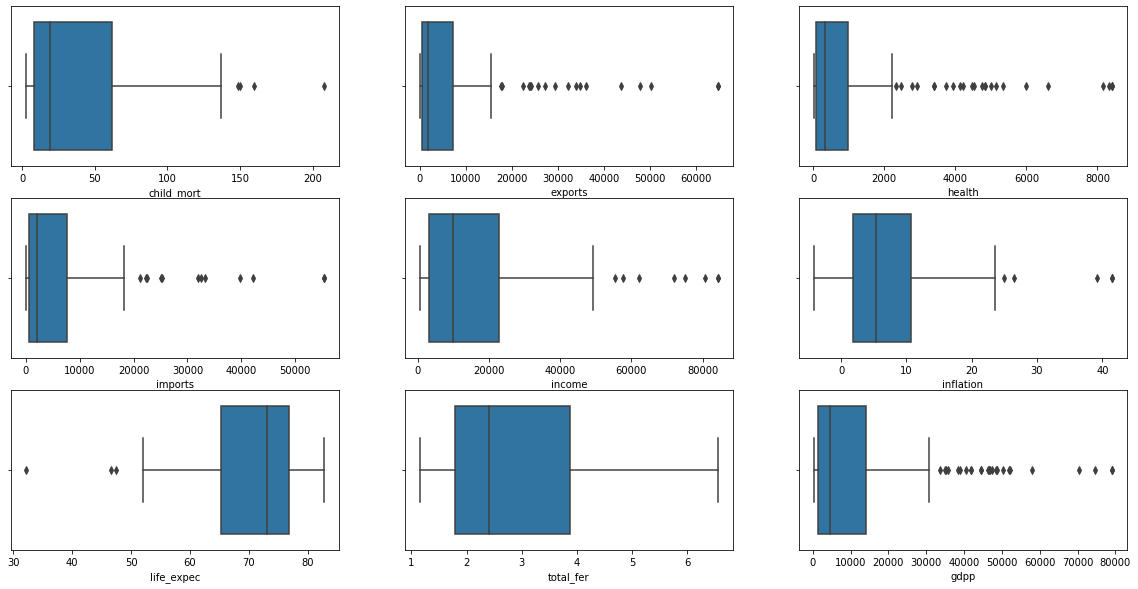

In [20]:
# Again plotting and checking for the outliers

plt.figure(figsize = (20,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

After the outlier treatment, we now have values that look like outliers in the above plot, this is an artifact of the earlier transformation. These values are within the "normal" expected range of values for the data.

As per the business requirement, not capping the outliers further.

## 7. Clustering 

In [21]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
# Calculating the Hopkins score

hopkins(df.drop('country', axis = 1))

0.9346432615222622

The score is high indicating that the data is good to perform clustering

## 8. Scaling

In [23]:
# Performing Standard scaling to scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.64524315, -0.6500669 ]])

In [24]:
# Creating a new dataframe for the columns excluding country

df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


## 9. Silhouette score and Elbow curve

In [25]:
# Silhouette score formula
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.46945658285687586
For n_clusters=3, the silhouette score is 0.4035259981391569
For n_clusters=4, the silhouette score is 0.3919682996098615
For n_clusters=5, the silhouette score is 0.3087922350851772
For n_clusters=6, the silhouette score is 0.2966559014955861
For n_clusters=7, the silhouette score is 0.2898602168849804
For n_clusters=8, the silhouette score is 0.2801277393488442


As the value drop is most sudden at n=3 after that the value seems to be constant, so according to Silhouette Score number of clusters should be 3

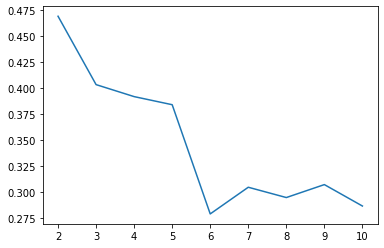

In [26]:
# Plotting the graph for the Silhouette score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

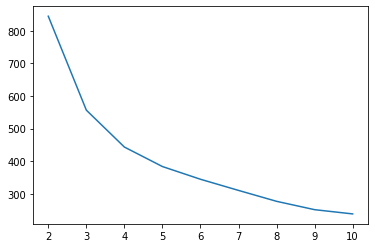

In [27]:
# Elbow curve-ssd

ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

As the change is slope is drastically at 3 so we will take 3 clusters

Considering Silhoutte curve, elbow curve and business requirement , the number of clusters considered are 3.

## 10. Final Cluster

In [28]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=50)

In [29]:
# Creating a copy of the dataframe df

df_kmean = df.copy()

In [30]:
# Creating a seperate dataframe for the labels which are generated for clustering

label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [31]:
# Merging the two datarames

df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [32]:
# Checking the counts of the data points for each cluster

df_kmean.label.value_counts()

0    90
2    48
1    29
Name: label, dtype: int64

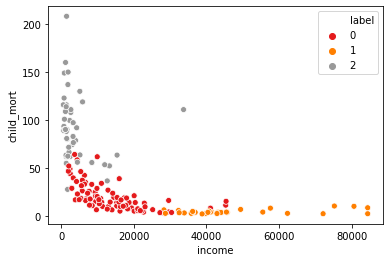

In [33]:
# Plotting the cluster Income vs Child mortality

sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

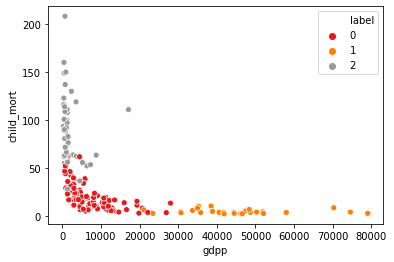

In [34]:
# Plotting the cluster GDP vs Child mortality

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

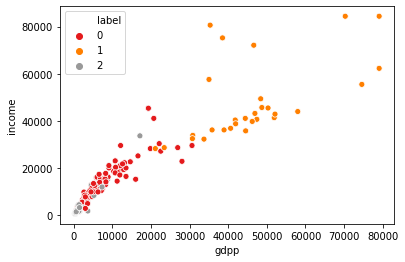

In [35]:
# Plotting the cluster GDP vs Income

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

## 11. Cluster Profiling

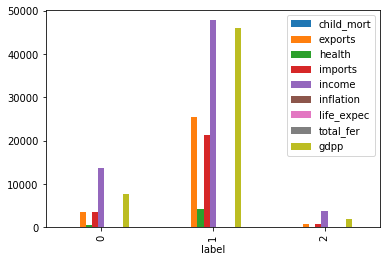

In [36]:
# Making sense out of the clusters

df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

The graph represents the values of different features in different clusters

<Figure size 1440x864 with 0 Axes>

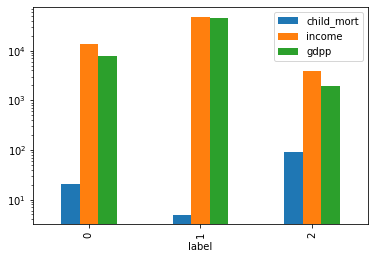

In [37]:
    # AS GDP, INCOME AND CHID_MORT are the required features so dropping the rest of the columns and plotting a barplot

plt.figure(figsize=(20, 12))
df_kmean.drop(['country', 'exports', 'health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar', logy = True)

We will be taking Cluster 2 as it has least GDP and Income and high Child mortality rate.

In [38]:
df_kmean[df_kmean['label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,2


In [39]:
# Top 5 countries which have Low Income, Low GDP and High Child Mortality rate

df_kmean[df_kmean['label'] == 2].sort_values(by = ['income','gdpp','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2


These are the top 5 countries which are in immediate need of AID using KMeans algorithm

## 11. Hierarchical Clustering

In [40]:
# importing the libraries for the Heirarchial Clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

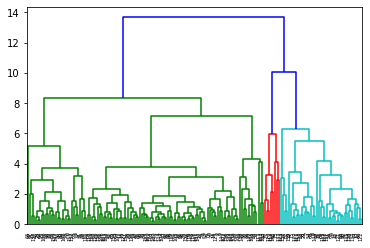

In [41]:
# Creating the dendogram for the dataframe

mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [42]:
# Taking 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [43]:
# Assign cluster labels

df1['cluster_labels'] = cluster_labels
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259,0
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726,0
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434,0
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950,0
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042,1


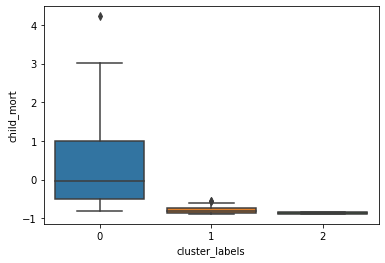

In [44]:
# plots

sns.boxplot(x='cluster_labels',y='child_mort', data=df1)

Cluster 0 has highest Child mortatlity rate

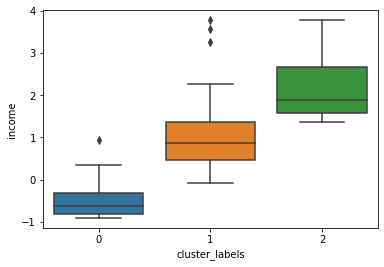

In [45]:
sns.boxplot(x='cluster_labels',y='income', data=df1)

Cluster 0 has the least income

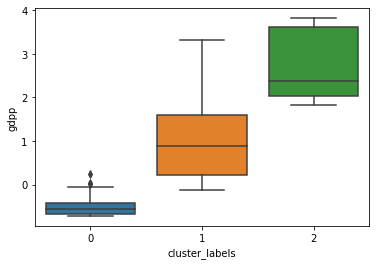

In [46]:
sns.boxplot(x='cluster_labels',y='gdpp', data=df1)

Cluster 0 has the least GDP

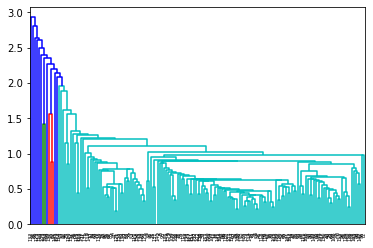

In [47]:
 #Single linkage
    
mergings = linkage(df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

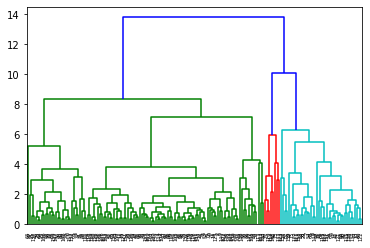

In [48]:
# Complete Linkage

mergings = linkage(df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

## 12. Final Clustering using Hierarchical

In [49]:
# K=3 ie 3 clusters
# Final Hierarchical Clustering

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [50]:
df_herr = df.copy()

In [51]:
df_herr['cluster_labels'] = cluster_labels
df_herr.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


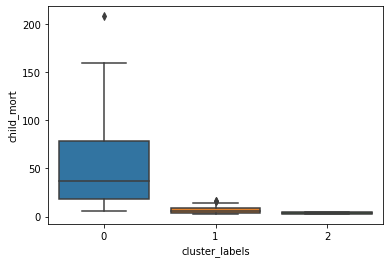

In [52]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df_herr)

Cluster 0 has the highest mortality rate 

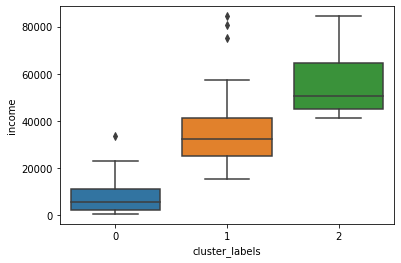

In [53]:
sns.boxplot(x='cluster_labels', y='income', data=df_herr)

Cluster 0 has the lowest income

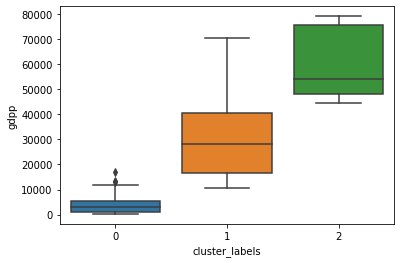

In [54]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df_herr)

Cluster 0 has the lowest GDP

In [55]:
df_herr.cluster_labels.value_counts()

0    118
1     41
2      8
Name: cluster_labels, dtype: int64

## 13. Clustering Profiling for Hierarchical 

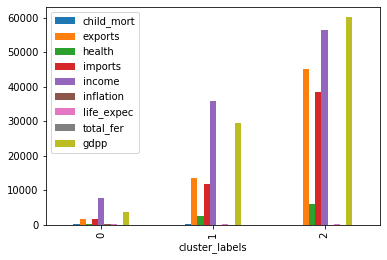

In [56]:
# Making sense out of the clusters

df_herr.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

<Figure size 1440x864 with 0 Axes>

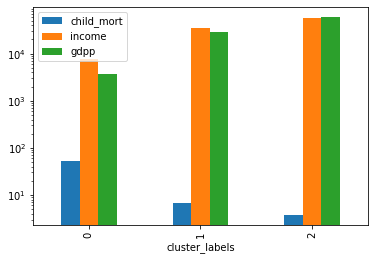

In [57]:
# AS GDP, INCOME AND CHID_MORT are the required features so dropping the rest of the columns and plotting a barplot

plt.figure(figsize=(20, 12))
df_herr.drop(['country', 'exports', 'health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar', logy=True)

As per the graph above, we will be using cluster 0 to determine the countries which are in need as it has low income and GDP and high mortality rate.

In [58]:
# Top 5 countries which have Low Income, Low GDP and High Child Mortality rate

df_herr[df_herr['cluster_labels'] == 0]
df_herr[df_herr['cluster_labels'] == 0].sort_values(by = ['income','gdpp','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0


Using K-means and Hierarchical Clustering, The top 5 countries which are in immediate need of the AID are:
Congo, Dem. Rep., Liberia, Burundi, Niger and Central African Republic